In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.signal import savgol_filter

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams.update({'font.size': 14})

In [41]:
'''
convenience functions
'''

def smooth(y, window, poly=1):
    '''
    y: vector to be smoothed 
    window: size of the smoothing window '''
    return savgol_filter(y,window,poly)

def save_data(data, ep_num, ep, lr, gamma):
    if ep_num > ep:
        temp = data[-1]
        temp = np.pad(temp,(0,ep_num-len(temp)),mode = 'constant',constant_values = (np.nan))
        data[-1] = temp
    fname = "reinforce_v1_lr"+"{:.4f}".format(lr)[-4:]+"_g"+"{:.4f}".format(gamma)[-4:]+"_runs{:1d}_eps".format(runs)+str(ep_num)+".csv"
    np.savetxt(fname, data, delimiter = "," )
    print("data saved in file {}".format(fname))
    if ep_num == ep:
        plot_smoothed_scores(score_stack)
        
def read_data(fname):
    data = np.loadtxt(fname, delimiter = "," )
    return data
        
def plot_smoothed_scores_wip(data, avg_plot = 1, save = 1, fname = "demo.pdf"):
    '''
    Plot incomplete score_stacks (deals with nans errors in savgol filters)

    '''
    # first plot
    fig,axs = plt.subplots(1,1, figsize = (14,7))
    for run, scores in enumerate(data):
        try:
            avg_score_hist = smooth(scores,smoothen_over)
            axs.plot(avg_score_hist, label = "run "+str(run+1))
        except Exception as e:
            print(str(e)+"for run {}".format(run+1))

    # set labels
    axs.set_xlabel("Episodes")
    axs.set_ylabel("Rewards")
    
    # save plot
    if save:
        plt.tight_layout()
        fig.savefig(fname+"_runs.pdf")
    
    # plot legends
    axs.legend()
    
    # calculate stdev and avg of all runs and plot
    avg = np.nanmean(data, axis = 0)
    std = np.std(data, axis = 0)
    
    # second plot
    
    try:
        fig,axs = plt.subplots(1,1, figsize = (14,7))
        axs.fill_between(range(len(avg)),smooth(avg-std, smoothen_over), smooth(avg+std, smoothen_over), alpha = 0.2)
        axs.plot(avg, label = "average over "+str(len(data))+" runs")
        
        # set labels
        axs.set_xlabel("Episodes")
        axs.set_ylabel("Rewards")
        
        # plot legends
        axs.legend()

        # save plot
        if save:
            plt.tight_layout()
            fig.savefig(fname+"_average.pdf")

        # display fig
        fig.show()
    except Exception as e:
        print(str(e)+"for run {}".format(len(data)))
    

cwd = os.getcwd()
if cwd == "/content":
    from google.colab import drive
print("cwd is :", cwd)
def printdocs(pname):
    exec("print("+str(pname)+".__doc__)")

if cwd == "/content":
    drive.mount('/content/drive')
    !ls /content/drive/MyDrive/data/RLA3_data
    %cd /content/drive/MyDrive/data/RLA3_data
    from Helper import argmax, softmax
else:
    print("cwd is :", cwd)

print("argmax docs :", argmax.__doc__)
print("softmax docs :", softmax.__doc__)

C:\Users\ambar\AppData\Local\Temp\ipykernel_13332\1132843501.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


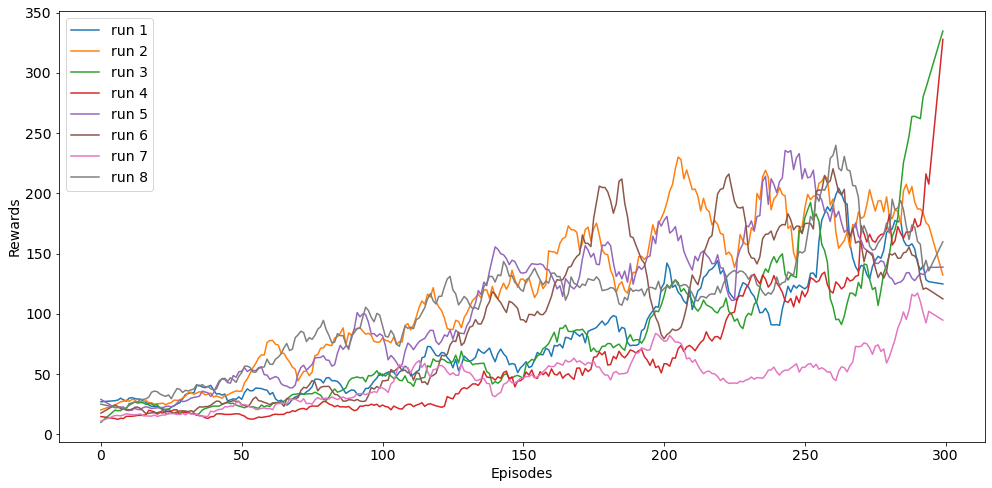

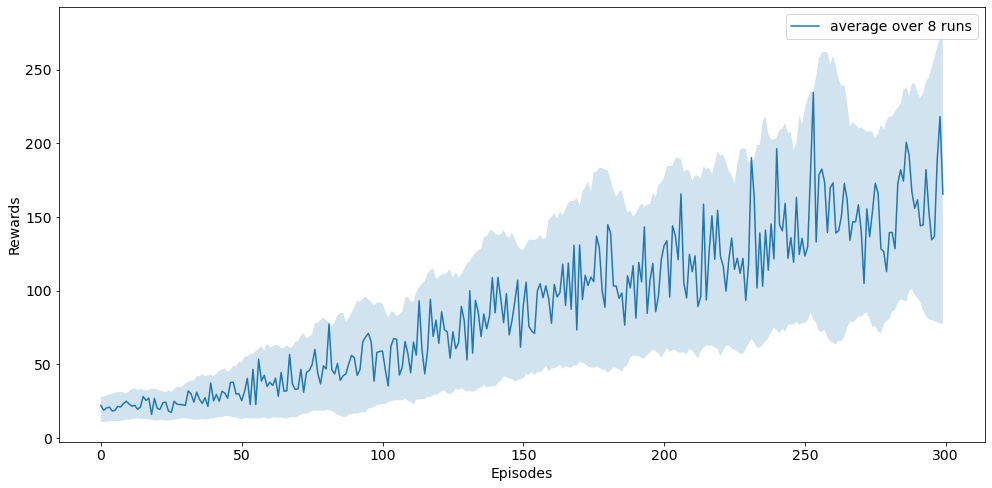

In [40]:
# learnrate = 0.001
# gam = 0.99
# runs = 8
# ep_num = 2000
# save_data_cadence = 200
# smoothen_over = 11
# if save_data_cadence>ep_num:
#     print("WARNING : data will not get saved if save cadence is more than ep_num")


# testing
learnrate = 0.001
gam = 0.99
runs = 8
ep_num = 300
smoothen_over = 11
    
fname = "reinforce_v1_lr"+"{:.4f}".format(learnrate)[-4:]+"_g"+"{:.4f}".format(gam)[-4:]+"_runs{:1d}_eps".format(runs)+str(ep_num)+".csv"
fname_im = "reinforce_v1_lr"+"{:.4f}".format(learnrate)[-4:]+"_g"+"{:.4f}".format(gam)[-4:]+"_runs{:1d}_eps".format(runs)+str(ep_num)
score_stack = read_data(fname)

plot_smoothed_scores_wip(score_stack, avg_plot = 1, save = 1, fname = fname_im)
